In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize


In [106]:
!pip install kaggle


# 1. Data Loading & Inspection

In [2]:
df = pd.read_csv('data.csv')

C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\1507164070.py:1: DtypeWarning: Columns (403,405,832,833,841,844,857,915,916,928,929,941,942,954,955,957,958,967,968,970,971,980,981,993,994,996,997,1006,1007,1009,1010,1022,1023,1035,1036,1048,1049,1071,1072,1084,1085,1087,1088,1097,1098,1100,1101,1110,1111,1113,1114,1126,1127,1139,1140,1149,1150,1152,1153,1162,1163,1165,1166,1178,1179,1191,1192,1204,1205,1217,1218,1227,1228,1230,1231,1240,1241,1243,1244,1256,1257,1269,1270,1282,1283,1295,1296,1306,1308,1309,1319,1321,1322,1335,1347,1348,1373,1374,1386,1387,1399,1400,1412,1413,1451,1452,1453,1480,1481,1482,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1654,1669,1704,1732,1734,1735,1736,1737,1738,1739,1740,1741,1742,1743,1744,1746,1747,1748,1749,1750,1751,1752,1753) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [14]:
# Display the first few rows of the dataset for inspection
print("Task 1: Data Loading & Inspection")
df.head()

Task 1: Data Loading & Inspection


,Unnamed: 0,hhcode,gender1,gender2,gender3,gender4,gender5,gender6,gender7,gender8,...,longtermrainfallshifts2,longtermrainfallshifts3,adjtempshifts1_1,adjtempshifts2_1,adjtempshifts3_1,adjrainfallshifts1_1,adjrainfallshifts2_1,adjrainfallshifts3_1,interviewer,vname
0,0,10010601,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.
1,1,10010602,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.
2,2,10010603,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.
3,3,10010604,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.
4,4,10010605,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.


In [15]:
df_f = df.filter(regex='^(hhcode|gender|age|educ|married|farmwork|nfarmwork|adm0|adm1|adm2|hhsize)')
df_f

,hhcode,gender1,gender2,gender3,gender4,gender5,gender6,gender7,gender8,age1,...,nfarmwork33,nfarmwork34,nfarmwork35,nfarmwork36,nfarmwork37,nfarmwork38,adm0,adm1,adm2,hhsize
0,10010601,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,22.0
1,10010602,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,20.0
2,10010603,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,12.0
3,10010604,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,11.0
4,10010605,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,100090113,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,kenya,WESTERN,VIHIGA,5.0
9593,100090114,1.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,kenya,WESTERN,VIHIGA,5.0
9594,100090115,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NaN,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,kenya,WESTERN,VIHIGA,7.0
9595,100090116,1.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,kenya,WESTERN,VIHIGA,5.0


In [16]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Columns: 233 entries, hhcode to hhsize
dtypes: float64(229), int64(1), object(3)
memory usage: 17.1+ MB


In [19]:
df_f.dtypes

hhcode           int64
gender1        float64
gender2        float64
gender3        float64
gender4        float64
                ...   
nfarmwork38    float64
adm0            object
adm1            object
adm2            object
hhsize         float64
Length: 233, dtype: object

# 2. Descriptive Statistics

In [24]:
print("Task 2: Descriptive statistics for key variables")

# Gender
age = df_f.filter(regex='^age').describe()
print("Descriptive statistics for age:")
print(age)

# Gender
gender_stats = df_f.filter(regex='^gender').describe()
print("Descriptive statistics for gender:")
print(gender_stats)

# Marital status
married_stats = df_f.filter(regex='^married').describe()
print("\nDescriptive statistics for marital status:")
print(married_stats)

# Education background
educ_stats = df_f.filter(regex='^educ').describe()
print("\nDescriptive statistics for education background:")
print(educ_stats)

# Farmworks
farmwork_stats = df_f.filter(regex='^farmwork').describe()
print("\nDescriptive statistics for farmwork stats:")
print(farmwork_stats)

# Non-Farmworks
nfarmwork_stats = df_f.filter(regex='^nfarmwork').describe()
print("\nDescriptive statistics for Non-farmwork stats:")
print(nfarmwork_stats)

# Household size
hhsize_stats = df_f['hhsize'].describe()
print("\nDescriptive statistics for household size:")
print(hhsize_stats)

Task 2: Descriptive statistics for key variables
Descriptive statistics for age:
              age1         age2         age3         age4         age5  \
count  9448.000000  9233.000000  8980.000000  8545.000000  7783.000000   
mean     48.664903    36.589624    22.823904    18.927856    16.051925   
std      13.612751    14.047233    13.020799    12.021733    11.540424   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      39.000000    26.000000    14.000000    11.000000     8.000000   
50%      48.000000    36.000000    21.000000    17.000000    15.000000   
75%      58.000000    46.000000    30.000000    25.000000    21.000000   
max     100.000000   115.000000   100.000000   134.000000    90.000000   

              age6         age7         age8         age9        age10  ...  \
count  6781.000000  5704.000000  4764.000000  3344.000000  3040.000000  ...   
mean     13.738903    11.964478    10.279681     8.009868     6.996339  ...   
std      11.845


Descriptive statistics for farmwork stats:
         farmwork1    farmwork2    farmwork3    farmwork4    farmwork5  \
count  8750.000000  8505.000000  8201.000000  7777.000000  6982.000000   
mean      1.037029     1.166255     1.245946     1.259226     1.262103   
std       0.205091     0.418149     0.520193     0.555023     0.602762   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       1.000000     1.000000     2.000000     2.000000     2.000000   
max       2.000000     2.000000     2.000000     6.000000     6.000000   

         farmwork6    farmwork7    farmwork8    farmwork9   farmwork10  ...  \
count  5969.000000  4895.000000  3979.000000  2618.000000  2310.000000  ...   
mean      1.233875     1.173851     1.105554     0.944232     0.890043  ...   
std       0.704437     0.739047     0.740223     0.7

# 3. Data Cleaning & Transformation

In [129]:
df_f.head()

,hhcode,gender1,gender2,gender3,gender4,gender5,gender6,gender7,gender8,age1,...,nfarmwork34,nfarmwork35,nfarmwork36,nfarmwork37,nfarmwork38,adm0,adm1,adm2,hhsize,both_activities
0,10010601,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,57.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,22.0,True
1,10010602,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,20.0,True
2,10010603,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,47.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,12.0,True
3,10010604,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,51.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,11.0,True
4,10010605,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,56.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,24.0,True


In [25]:
# Check for missing values
missing_values = df_f.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)



Missing values in the dataset:
hhcode            0
gender1         798
gender2        1019
gender3        1296
gender4        1773
               ... 
nfarmwork38    9594
adm0              0
adm1              0
adm2              0
hhsize          134
Length: 233, dtype: int64


Inconsistencies

In [138]:
import numpy as np

# Identify rows where gender columns have values other than 1 or 2
gender_columns = df_f.filter(regex='^gender\d+$')


# Function to replace values not equal to 1 or 2 with NaN
def replace_invalid_values(value):
    if value not in [1, 2]:
        return np.nan
    else:
        return value

# Apply the function to each element in the DataFrame
df_f[gender_columns.columns] = gender_columns.applymap(replace_invalid_values)


C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\2922644374.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[gender_columns.columns] = gender_columns.applymap(replace_invalid_values)


In [139]:

#Farmwork
# Identify rows where gender columns have values other than 1 or 2
farmwork_columns = df_f.filter(regex='^farmwork\d+$')

# Apply the function to each element in the DataFrame
df_f[farmwork_columns.columns] = farmwork_columns.applymap(replace_invalid_values)

#Non-Farmwork
# Identify rows where gender columns have values other than 1 or 2
nfarmwork_columns = df_f.filter(regex='^nfarmwork\d+$')

# Apply the function to each element in the DataFrame
df_f[nfarmwork_columns.columns] = nfarmwork_columns.applymap(replace_invalid_values)

#Married
# Assuming 'married1', 'married2', ..., 'married39' are columns indicating marital status
married_columns = df_f.filter(regex='^married\d+$')

# Function to replace values not equal to 1 or 2 with NaN
def replace_invalid_values_married(value):
    if value not in [1, 2,3,4]:
        return np.nan
    else:
        return value

df_f[married_columns.columns] =married_columns.applymap(replace_invalid_values_married)


C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\396387477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[farmwork_columns.columns] = farmwork_columns.applymap(replace_invalid_values)
C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\396387477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[nfarmwork_columns.columns] = nfarmwork_columns.applymap(replace_invalid_values)
C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\396387477.py:26: SettingWithCopyWarning: 
A value is trying to be 

Distribution

C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\1058416440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_status_columns.replace(mapping, inplace=True)


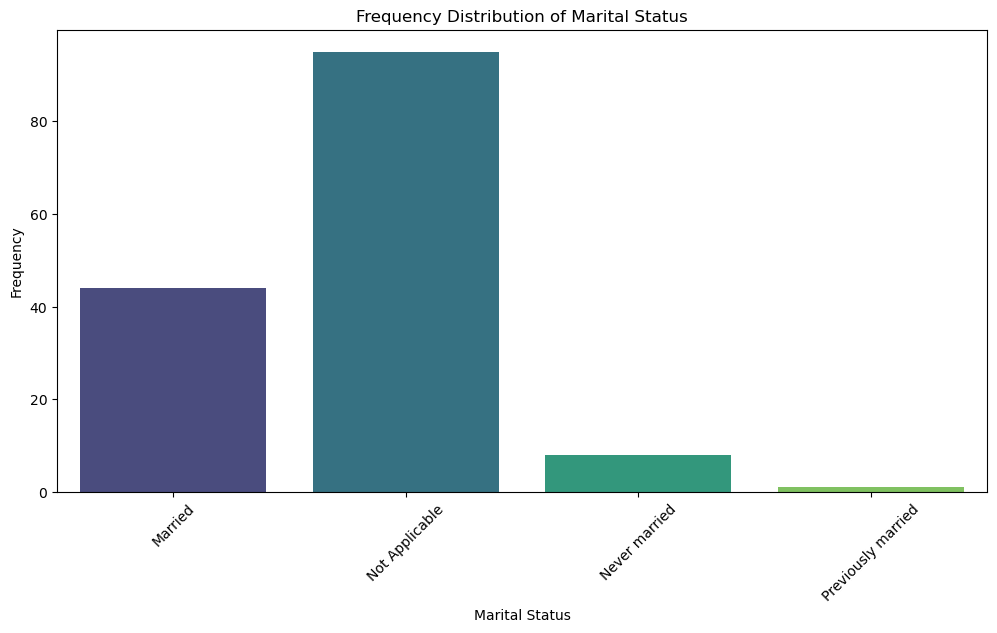

In [140]:
# Assuming 'married1', 'married2', ..., 'married39' are columns indicating marital status
marital_status_columns = df_f.filter(regex='^married\d+$')

# Replace values according to the given mapping
mapping = {1: 'Married', 2: 'Never married', 3: 'Previously married', 4: 'Not Applicable'}
marital_status_columns.replace(mapping, inplace=True)

# Melt the columns to long format for easier plotting
marital_status_columns = marital_status_columns.melt(value_name='Marital Status', var_name='Household Member')

# Remove rows with missing values
marital_status_columns.dropna(subset=['Marital Status'], inplace=True)


# Create a count plot for marital status
plt.figure(figsize=(12, 6))
marital_status_plot = sns.countplot(x='Marital Status', data=marital_status_columns, palette='viridis')

# Set plot labels and title
plt.title('Frequency Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\4258305331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_columns.replace(mapping, inplace=True)


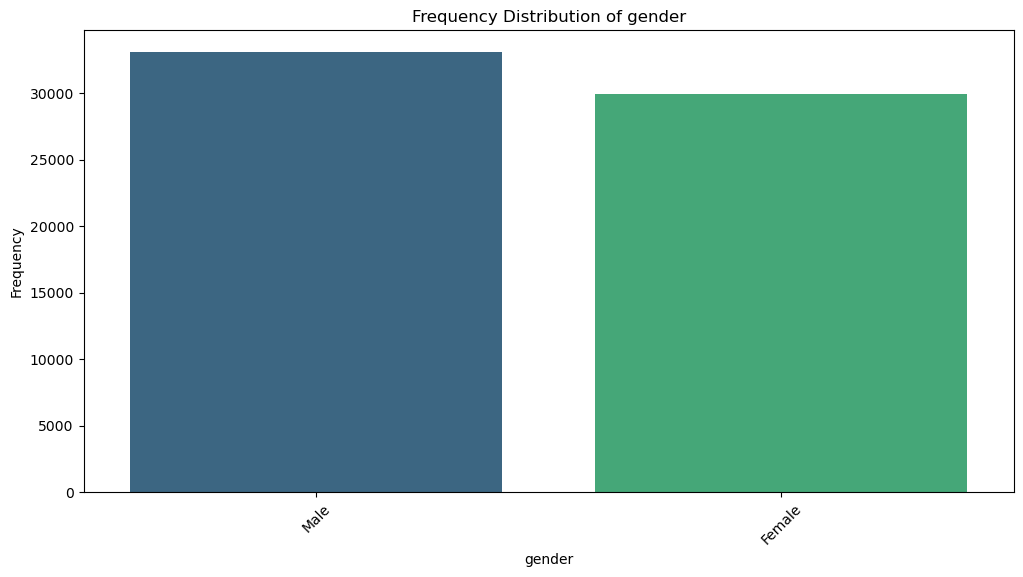

In [141]:
#Gender Visual

# Assuming 'married1', 'married2', ..., 'married39' are columns indicating marital status
gender_columns = df_f.filter(regex='^gender\d+$')

# Replace values according to the given mapping
mapping = {1: 'Male', 2: 'Female'}
gender_columns.replace(mapping, inplace=True)

# Melt the columns to long format for easier plotting
gender_columns = gender_columns.melt(value_name='gender', var_name='Household Member')

# Remove rows with missing values
gender_columns.dropna(subset=['gender'], inplace=True)

# Create a count plot for marital status
plt.figure(figsize=(12, 6))
marital_status_plot = sns.countplot(x='gender', data=gender_columns, palette='viridis')

# Set plot labels and title
plt.title('Frequency Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Missing values in education columns:


C:\Users\lmumelo\AppData\Local\Temp\ipykernel_3400\1639788153.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f[educ_columns.columns] = educ_columns.apply(lambda col: col.fillna(col.mean()), axis=0)


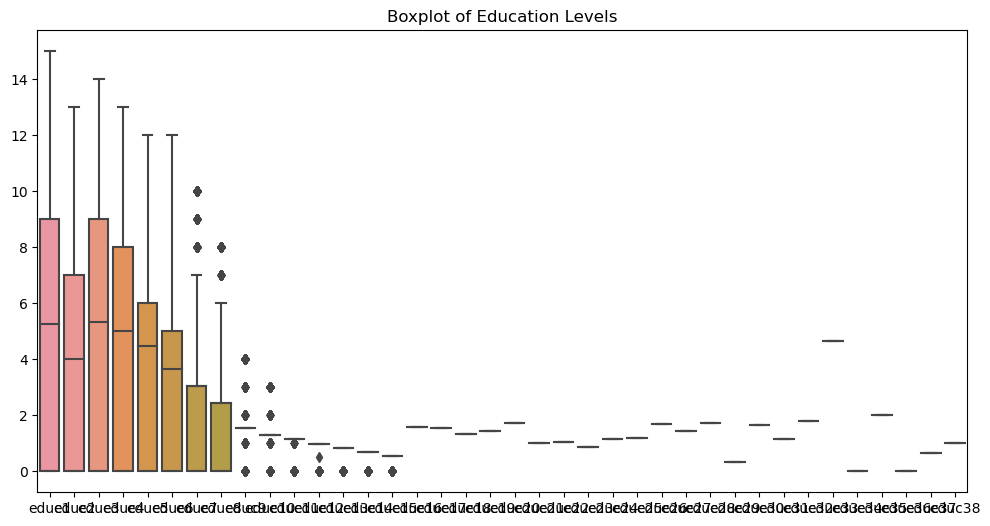

In [86]:
# Check for missing values in education columns
educ_columns = df_filtered.filter(regex='^educ\d+$')
missing_values_educ = educ_columns.isnull().sum()
print("Missing values in education columns:")

# Fill missing values in education columns with the mean value
df_f[educ_columns.columns] = educ_columns.apply(lambda col: col.fillna(col.mean()), axis=0)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=educ_columns)
plt.title('Boxplot of Education Levels')
plt.show()


In [85]:

# Winsorize each education column to handle outliers
for col in educ_columns.columns:
    df_filtered[col] = winsorize(df_filtered[col], limits=[0.05, 0.05])


# 4. Probability & Mathematical Modelling:

In [87]:
print('Probability' )
# Probability Calculation
# Assuming 'farmwork' and 'nfarmwork' are columns indicating farm and non-farm activities
# Create a list of columns related to farm and non-farm activities
farmwork_columns = df_filtered.filter(regex='^farmwork\d+$').columns
nfarmwork_columns = df_filtered.filter(regex='^nfarmwork\d+$').columns

# Create a new column 'both_activities' indicating whether at least one member is engaged in both farm and non-farm activities
df_filtered['both_activities'] = (df_filtered[farmwork_columns] == 1).any(axis=1) & (df_filtered[nfarmwork_columns] == 1).any(axis=1)
df_filtered.head()

Probability


,hhcode,gender1,gender2,gender3,gender4,gender5,gender6,gender7,gender8,age1,...,nfarmwork34,nfarmwork35,nfarmwork36,nfarmwork37,nfarmwork38,adm0,adm1,adm2,hhsize,both_activities
0,10010601,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,57.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,22.0,True
1,10010602,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,20.0,True
2,10010603,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,47.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,12.0,True
3,10010604,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,51.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,11.0,True
4,10010605,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,56.0,...,NaN,NaN,NaN,NaN,NaN,burkinafaso,Bam,Tikare,24.0,True


Probability Calculation

In [88]:
# Probability Calculation
probability_both_activities = df_filtered['both_activities'].mean()
print("Probability of a household having at least one member engaged in both farm and non-farm activities:", probability_both_activities)


Probability of a household having at least one member engaged in both farm and non-farm activities: 0.6758740823690432


Mathematical Modelling

In [89]:
# Mathematical Modelling
sample_size = 100

# Model the expected number of households meeting the criterion in a sample of 100 randomly selected households
expected_number = probability_both_activities * sample_size
print("Expected number of households meeting the criterion in a sample of 100 randomly selected households:", expected_number)

Expected number of households meeting the criterion in a sample of 100 randomly selected households: 67.58740823690432


# 5. Data visualisation

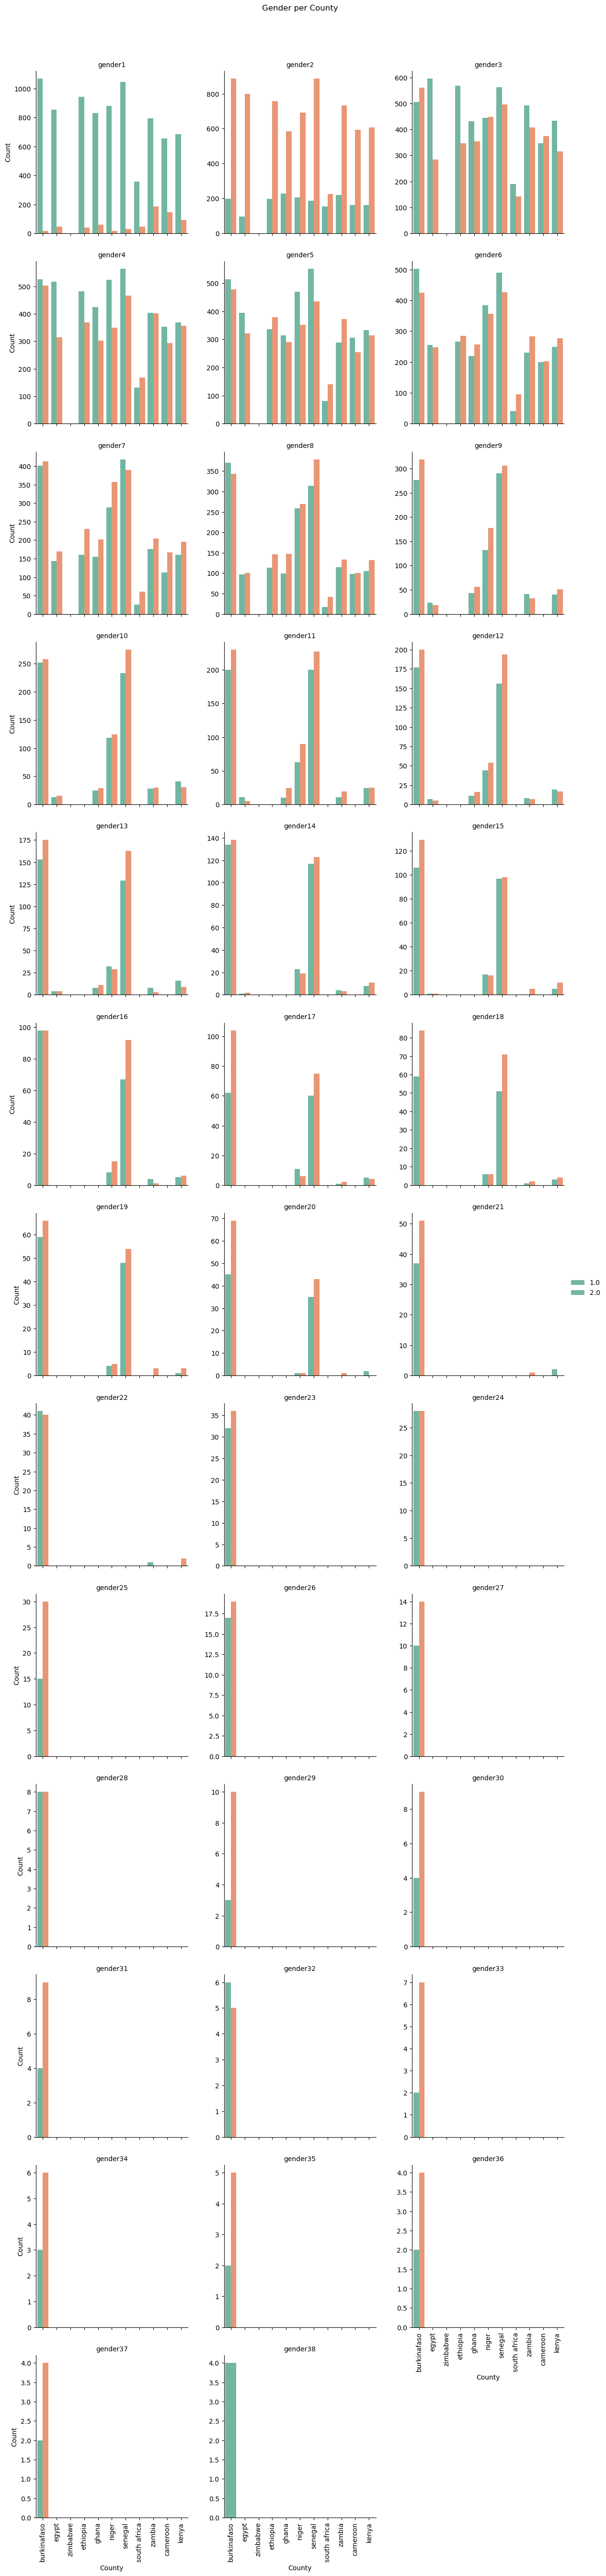

In [136]:
# Filter gender columns
gender_columns = df_f.filter(regex='^gender\d+$')

df_melted = pd.melt(df_f, id_vars=['adm0'], value_vars=gender_columns.columns, var_name='gender_column', value_name='gender_value')

# Replace invalid values with NaN (if not done previously)
df_melted['gender_value'] = df_melted['gender_value'].apply(replace_invalid_values)

# Facet grid plot using seaborn
g = sns.FacetGrid(df_melted, col='gender_column', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.countplot, x='adm0', hue='gender_value', palette='Set2')

# Tilt x-axis labels to 90 degrees
g.set_xticklabels(rotation=90)

# Set overall title and individual subplot titles
g.fig.suptitle('Gender per County', y=1.02)  # Overall title
g.set_axis_labels('County', 'Count')
g.set_titles(col_template='{col_name}')  # Subplot titles
g.add_legend()

# Show the plot
plt.show()

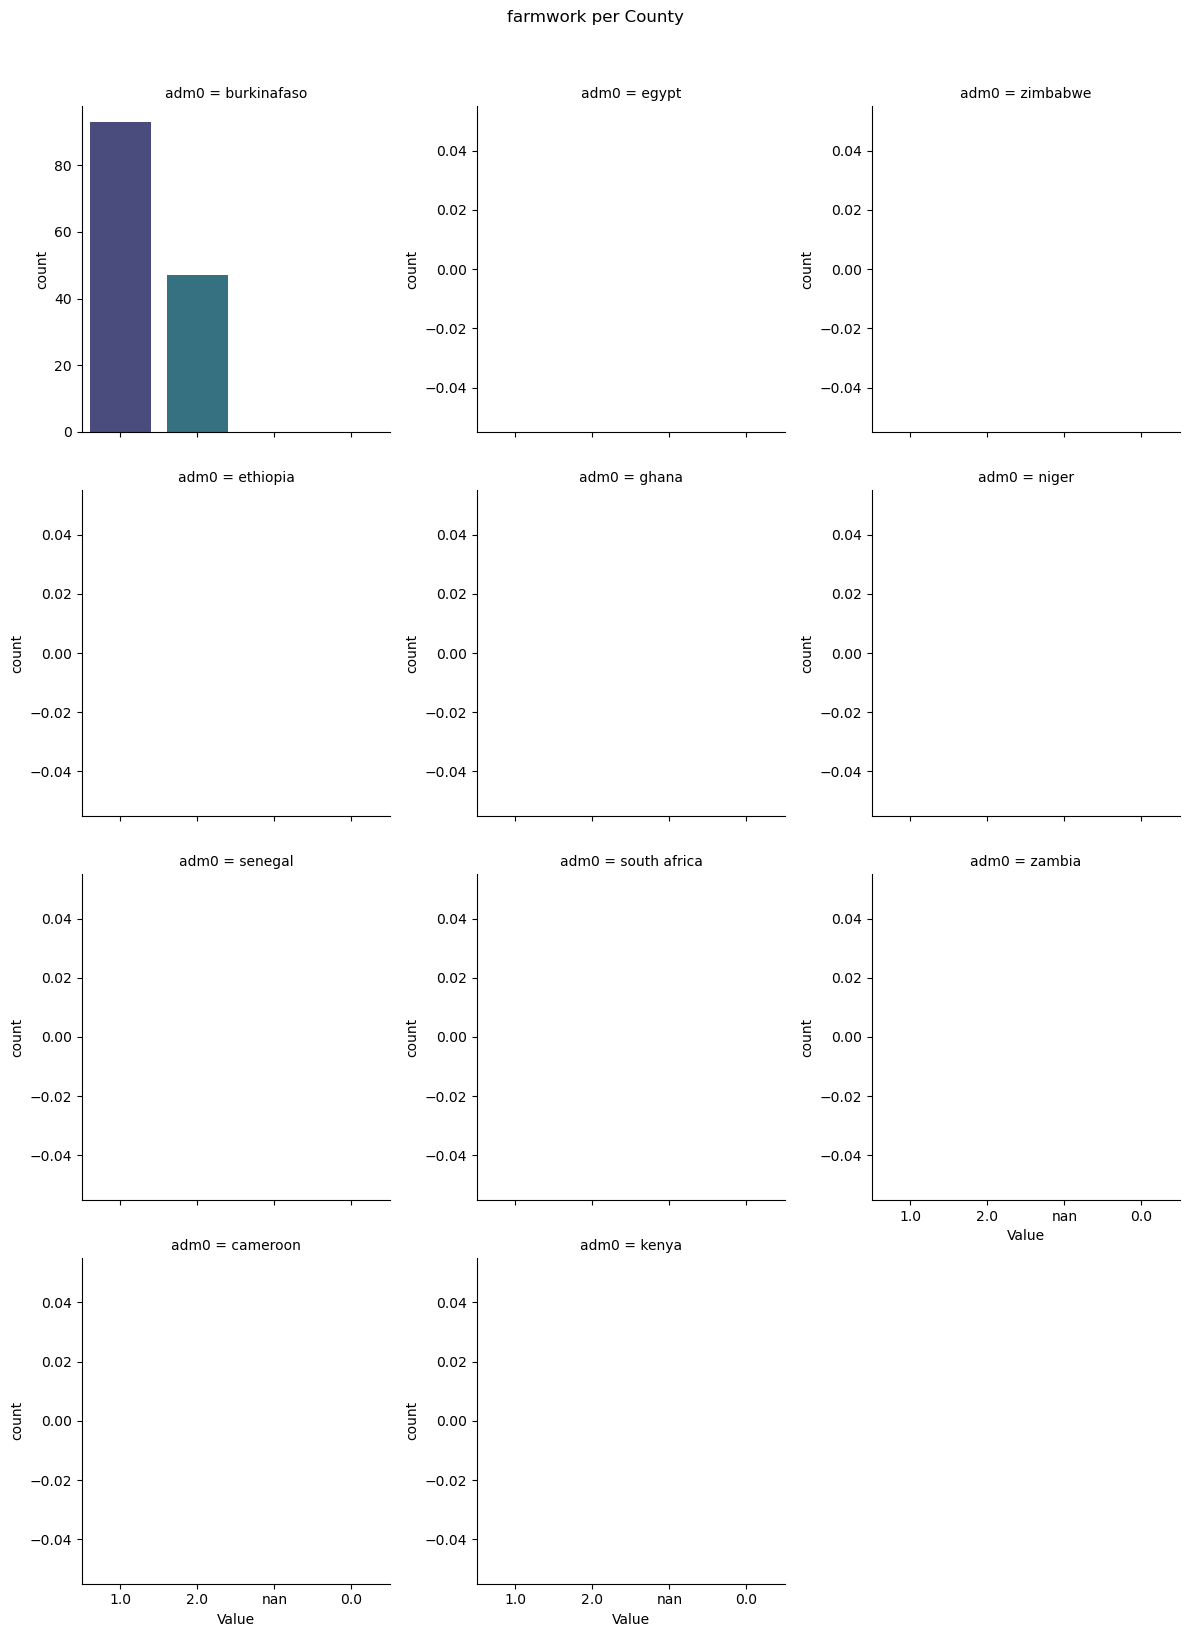

In [143]:
# Select farmwork columns and adm0 for visualization
farmwork_columns = df_f.filter(regex='^farmwork\d+$')
selected_columns = pd.concat([df_f['adm0'], farmwork_columns], axis=1)

# Melt the DataFrame to long format for easier plotting
melted_df = selected_columns.melt(id_vars='adm0', var_name='Farmwork', value_name='Value')

# Set up a facet grid for multiple subplots
g = sns.FacetGrid(melted_df, col='adm0', col_wrap=3, height=4, sharey=False)

# Create count plots for each farmwork variable within each adm0
g.map(sns.countplot, 'Value', order=df['farmwork1'].unique(), palette='viridis')
g.fig.suptitle('farmwork per County', y=1.02)
# Adjust layout and display the plot
g.tight_layout()
plt.show()